In [1]:
import warnings
warnings.filterwarnings(action='ignore')

import time

import numpy as np

import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model  # model 파일 로딩
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.callbacks import EarlyStopping # 학습 자동 중지
from tensorflow.keras.callbacks import ModelCheckpoint # 우수한 학습 모델 파일 저장

In [2]:
# MNIST 데이터셋 가져오기
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0 # 데이터 정규화

In [3]:
# MNIST 분류 모델 구성
model = Sequential()
model.add(Flatten(input_shape=(28, 28))) # 784
model.add(Dense(20, activation='relu'))

# model.add(Dense(20, input_shape=(784,), activation='relu'))

# model.add(Dense(20, input_dim=784, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(10, activation='softmax'))

# 모델 정보 출력
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 20)                15700     
_________________________________________________________________
dense_1 (Dense)              (None, 20)                420       
_________________________________________________________________
dense_2 (Dense)              (None, 10)                210       
Total params: 16,330
Trainable params: 16,330
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# 모델 생성, sparse_categorical_crossentropy: One-hot encoding 자동 지원
model.compile(loss='sparse_categorical_crossentropy', 
              optimizer='adam', metrics=['accuracy'])

# y_train_all = to_categorical(y_train_all, 10)  # One-Hot encoding
# y_test = to_categorical(y_test, 10)
# model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

mc = ModelCheckpoint(filepath='./Mnist.h5', monitor='val_accuracy',
                           verbose=1, save_best_only=True)

es = EarlyStopping(monitor='loss', patience=1,
                           restore_best_weights=True)

start = time.time()
hist = model.fit(x_train, y_train, validation_split=0.3, shuffle=True,
                epochs=100, batch_size=30, callbacks=[mc, es])
print('time:', time.time() - start)

print('모델 평가')
model.evaluate(x_test, y_test)

# model.save('./mnist_model.h5')

Epoch 1/100
1400/1400 [==============================] - 6s 4ms/step - loss: 0.8667 - accuracy: 0.7226 - val_loss: 0.2578 - val_accuracy: 0.9253

Epoch 00001: val_accuracy improved from -inf to 0.92528, saving model to .\Mnist.h5
Epoch 2/100
1400/1400 [==============================] - 4s 3ms/step - loss: 0.2418 - accuracy: 0.9307 - val_loss: 0.2168 - val_accuracy: 0.9379

Epoch 00002: val_accuracy improved from 0.92528 to 0.93794, saving model to .\Mnist.h5
Epoch 3/100
1400/1400 [==============================] - 4s 3ms/step - loss: 0.1910 - accuracy: 0.9439 - val_loss: 0.2043 - val_accuracy: 0.9403

Epoch 00003: val_accuracy improved from 0.93794 to 0.94028, saving model to .\Mnist.h5
Epoch 4/100
1400/1400 [==============================] - 4s 3ms/step - loss: 0.1736 - accuracy: 0.9478 - val_loss: 0.1954 - val_accuracy: 0.9437

Epoch 00004: val_accuracy improved from 0.94028 to 0.94372, saving model to .\Mnist.h5
Epoch 5/100
1400/1400 [==============================] - 4s 3ms/step - 

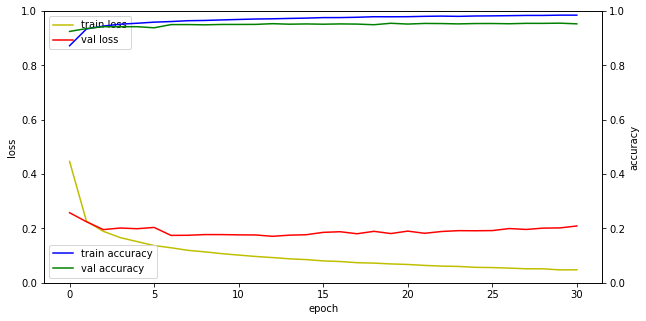

In [8]:
fig, loss_ax = plt.subplots()
# plt.figure(figsize=(6,4)) # ERROR
fig.set_size_inches(10, 5)  # 챠트 크기 설정

acc_ax = loss_ax.twinx()   # 오른쪽 y 축 설정

# 왼쪽 y 축 설정
loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')
loss_ax.set_ylim([0.0, 1.0]) # 값을 반영하여 변경

# 오른쪽 y 축 설정
acc_ax.plot(hist.history['accuracy'], 'b', label='train accuracy')
acc_ax.plot(hist.history['val_accuracy'], 'g', label='val accuracy')
acc_ax.set_ylim([0.0, 1]) # 0.0, 1: 0 ~ 100 %, 정확도임으로 변경하지 않음

# 축 레이블 설정
loss_ax.set_xlabel('epoch')  # 학습 횟수
loss_ax.set_ylabel('loss')   # 오차
acc_ax.set_ylabel('accuracy') # 정확도

loss_ax.legend(loc='upper left') # 오차 레이블 위치
acc_ax.legend(loc='lower left')  # 정확도 레이블 위치

plt.show()

In [9]:
# 모델 불러오기
model = load_model('./Mnist.h5')
model.summary()
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print('손실값:', test_loss, '/정확도:', (test_acc*100), '%')

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 20)                15700     
_________________________________________________________________
dense_7 (Dense)              (None, 20)                420       
_________________________________________________________________
dense_8 (Dense)              (None, 10)                210       
Total params: 16,330
Trainable params: 16,330
Non-trainable params: 0
_________________________________________________________________
313/313 - 0s - loss: 0.1877 - accuracy: 0.9563
손실값: 0.18768908083438873 /정확도: 95.63000202178955 %


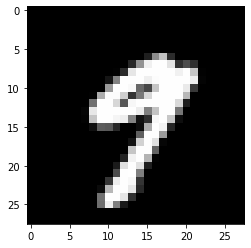

In [10]:
# 테스트셋에서 20번째 이미지 출력
plt.imshow(x_test[20], cmap="gray")
plt.show()

In [11]:
# 테스트셋의 20번째 이미지 클래스 분류
picks = [20]
predict = m.predict(x_test[picks])odel
print(predict)
print("손글씨 이미지 예측값 : ", np.argmax(predict[0]))

[[2.6988541e-08 3.5804419e-13 3.3269217e-17 1.4049516e-08 5.4521262e-08
  3.9711864e-07 8.5081342e-19 3.5898651e-07 7.8141714e-13 9.9999917e-01]]
손글씨 이미지 예측값 :  9


In [12]:
# 테스트셋의 20번째 이미지 클래스 분류
picks = [20]
predict = model.predict_classes(x_test[picks])
print("손글씨 이미지 예측값 : ", predict)

손글씨 이미지 예측값 :  [9]
